B1: Problem understanding
From the titanic dataset, build a predictive model which sort of people will likely to survive in the shipwreck


B2: Data understanding, Visualization


In [666]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets 
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score




In [667]:
train_df = pd.read_csv('../dataset/Titanic-Dataset.csv', index_col='PassengerId')
test_df = pd.read_csv('../dataset/Titanic-Dataset-Test.csv', index_col='PassengerId')


**Feature & Label Explanation**

- **Survived**  
  Target variable: 0 = did not survive, 1 = survived

- **Sex**  
  Passenger gender (male, female)

- **Pclass**  
  Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

- **Embarked**  
  Port of embarkation  
  - C = Cherbourg  
  - Q = Queenstown  
  - S = Southampton

- **SibSp**  
  Number of siblings and spouses aboard

- **Parch**  
  Number of parents and children aboard



In [668]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [669]:
train_df.shape

(891, 11)

In [670]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [671]:
# Null data
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [672]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [673]:
features = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]

for feature in features:
    train_df[feature] = train_df[feature].astype("category")

In [674]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


EDA: Exploratory Data Analys

1/ Correlating categorical features

Target Variable: **Survived**

In [675]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [676]:
train_df["Survived"].value_counts(normalize=True).to_frame()


,proportion
Survived,
0,0.616162
1,0.383838


**Sex**

In [677]:
train_df["Sex"].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [678]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


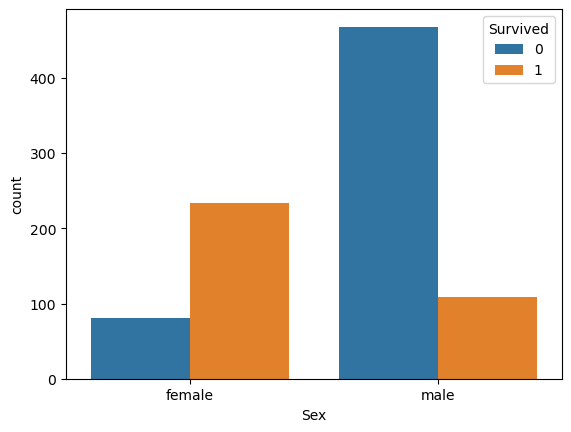

In [679]:
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.show()

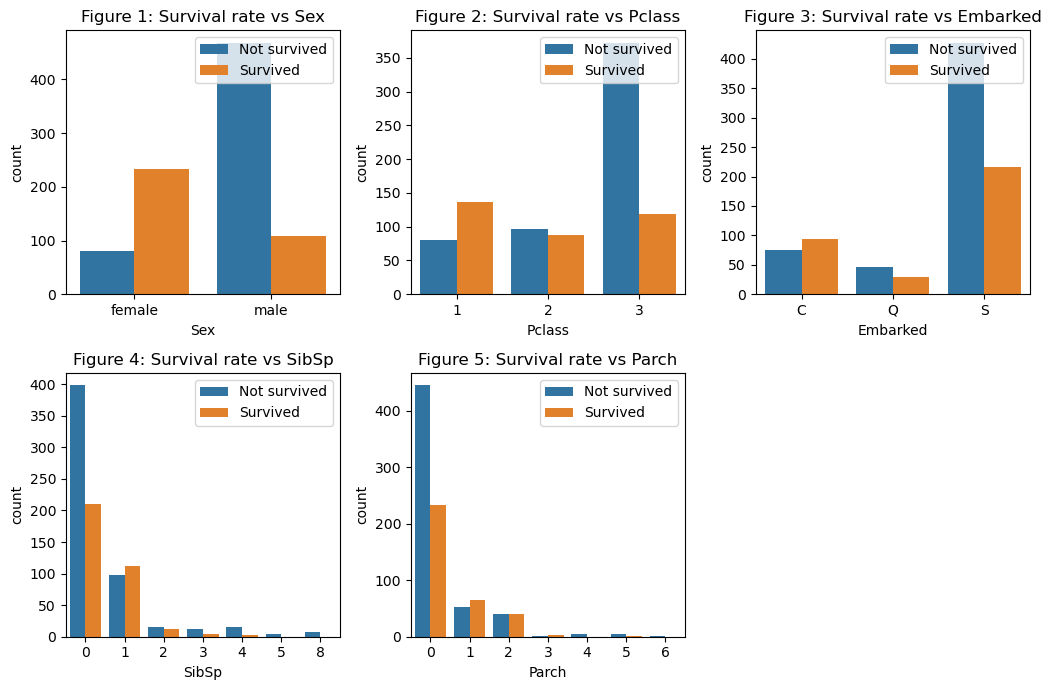

In [680]:
# Remaining categories

cols = ["Sex", "Pclass", "Embarked", "SibSp", "Parch"]
n_rows = 2
n_cols = 3

fig,axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))
# axs = axs.flatten()

for r in range(0, n_rows):
    for c in range(0, n_cols):
        index = r*n_cols + c # For loops in cols
        if index < len(cols):
            ax_i = axs[r, c] # The position where the plots are sketched
            sns.countplot(data=train_df, x=cols[index], hue="Survived", ax=ax_i)
            ax_i.set_title(f"Figure {index+1}: Survival rate vs {cols[index]}")
            ax_i.legend(title="", loc="upper right", labels = ["Not survived", "Survived"])
            
axs.flatten()[5].set_visible(False)
plt.tight_layout()
plt.show()

            


Observation:
* Sex: Female survival rate > male
* PClass: First class survival rate > the rest
* Embarked: People embarked at C harbor survival rate > the rest
* SibSp: People go with 1 sibling has better chance to survive
* Parch: 1 Parch survival rate > people with 0 Parch


2/ EDA for numerical features
Numerical features: Fares, Age


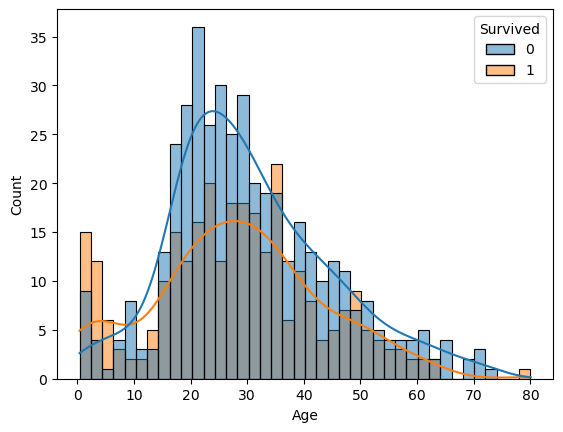

In [681]:
# Age
sns.histplot(data=train_df, x="Age", kde=True, hue="Survived", bins=40)
plt.show()

Majority Feature:
- Most people is in 18-40 ages
- Children has more chance to survive

In [682]:
# Fare
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

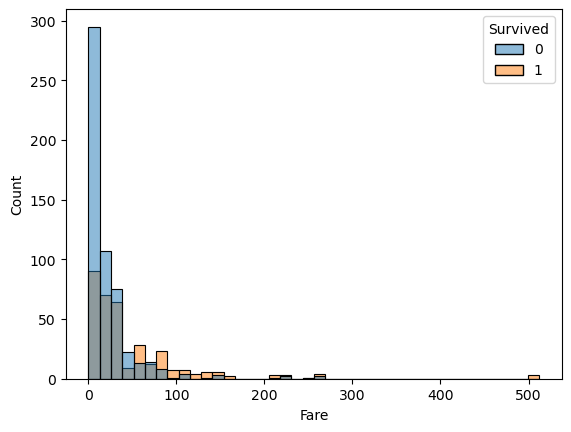

In [683]:
sns.histplot(data=train_df, x = "Fare", bins=40, hue="Survived")
plt.show()

Quartile cut (25%, 50%, 75%, 100% )

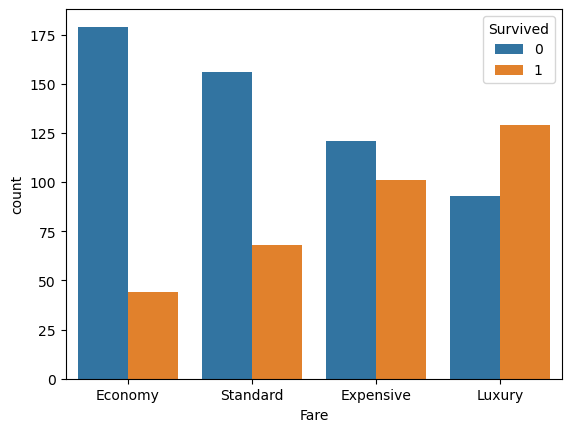

In [684]:
fare_categories = ["Economy", "Standard", "Expensive", "Luxury"]
quartile_data = pd.qcut(train_df["Fare"], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df["Survived"])
plt.show()


3/ Feature Engineering and Data Wrangling




3.1/ Feature Engineering


Use Regular Expression


In [685]:
# Name
train_df["Name"].head(20)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
11                      Sandstrom, Miss. Marguerite Rut
12                             Bonnell, Miss. Elizabeth
13                       Saundercock, Mr. William Henry
14                          Andersson, Mr. Anders Johan
15                 Vestrom, Miss. Hulda Amanda Adolfina
16                     Hewlett, Mrs. (Mary D Kingcome) 
17                                 Rice, Master. Eugene
18                         Williams,

In [686]:
import re #Regular Expression

def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()


In [687]:
train_df["Title"] = train_df["Name"].apply(lambda name: extract_title(name))

In [688]:
train_df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [689]:
test_df["Title"] = test_df["Name"].apply(lambda name: extract_title(name))

In [690]:
test_df["Title"].value_counts()


Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [691]:
def get_title(title):
    if title in ["Mr", "Mrs", "Master", "Miss"]:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"

In [692]:
train_df["Title"] = train_df["Title"].apply(lambda title: get_title(title))
test_df["Title"] = test_df["Title"].apply(lambda title: get_title(title))

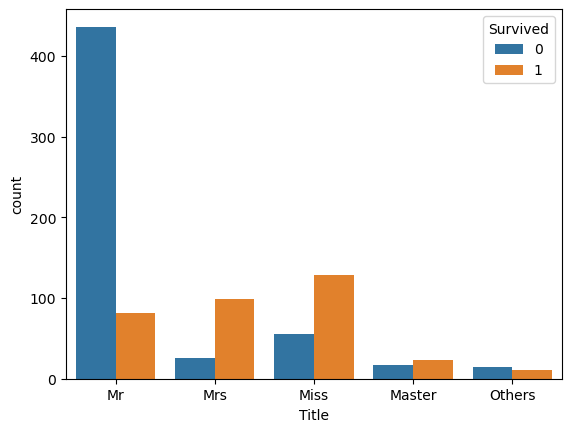

In [693]:
sns.countplot(data=train_df, x="Title", hue="Survived")
plt.show()

Family
**SibSp, Parch**

In [694]:
train_df["Family_size"] = train_df["SibSp"].astype("int") + train_df["Parch"].astype("int") + 1
test_df["Family_size"] = test_df["SibSp"].astype("int") + test_df["Parch"].astype("int") + 1

In [695]:
train_df["Family_Category"] = pd.cut(train_df["Family_size"], bins=[0,1,4,6,20], labels=["Solo", "Small", "Medium", "Large"])
test_df["Family_Category"] = pd.cut(test_df["Family_size"], bins=[0,1,4,6,20], labels=["Solo", "Small", "Medium", "Large"])


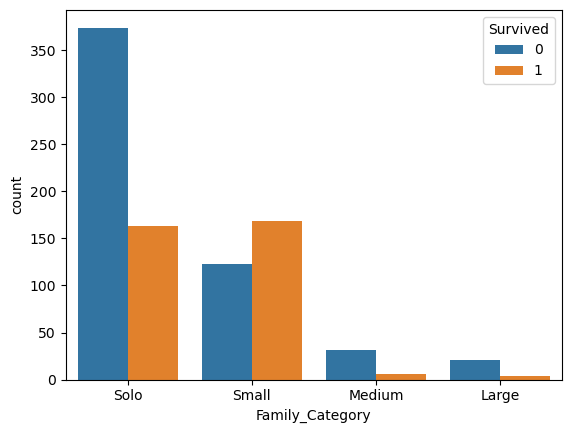

In [696]:
sns.countplot(data=train_df, x="Family_Category", hue="Survived")
plt.show()

3.2/ Data Wrangling

In [697]:
num_features = ["Age", "Fare"]
category_features = ["Sex", "Pclass", "Embarked", "Title", "Family_Category"]
feature_cols = num_features + category_features

print(feature_cols)


['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Category']


In [698]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f'{col} has {missing_count * 100 / n_rows:.2f}% missing values')

In [699]:
display_missing(test_df, feature_cols)

Age has 20.57% missing values
Fare has 0.24% missing values


Fill missing values

**Age**

In [700]:
age_by_sex_pclass = train_df.groupby(["Pclass", "Sex"], observed=False)["Age"].median()

In [701]:
age_by_sex_pclass

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [702]:
# Fill missing Age by median within each Pclass/Sex group
train_df["Age"] = train_df.groupby(["Pclass", "Sex"], observed=False)["Age"].transform(lambda x: x.fillna(x.median()))
test_df["Age"] = test_df.groupby(["Pclass", "Sex"], observed=False)["Age"].transform(lambda x: x.fillna(x.median()))

In [703]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)


Embarked has 0.22% missing values
Fare has 0.24% missing values


In [704]:
x = train_df[feature_cols]
y = train_df["Survived"]
x_test = test_df[feature_cols]

In [705]:
# Preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [706]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

category_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [707]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", category_transformer,category_features)  
])

In [708]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Category'])])

In [709]:
X = preprocessor.transform(x)
X_test = preprocessor.transform(x_test)

In [710]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

B3: Model Training

In [711]:
# Binary classification

In [ ]:
from sklearn.linear_model import LogisticRegression


logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)

logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [722]:
logreg_model.score(X_val, y_val)


0.8156424581005587

In [725]:
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

In [717]:
y_pred = logreg_model.predict(X_val)

In [723]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.7580645161290323, 0.7230769230769231)

In [724]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       114
           1       0.76      0.72      0.74        65

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [726]:
poly = PolynomialFeatures(degree=2)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.fit_transform(X_val)

In [727]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [728]:
poly_log_reg.score(poly_features_X_val, y_val)

0.8324022346368715

B4: Evaluation


In [729]:
# cross validation
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
lr_score = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)

In [730]:
lr_score

array([0.83240223, 0.8258427 , 0.79775281, 0.81460674, 0.85955056])

In [732]:
lr_score.mean(), lr_score.std()

(0.826031008725127, 0.020466357172416235)